In [1]:
# Computations
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
import statsmodels.formula.api as smf

# Progressbar
import progressbar

# sklearn data
import sklearn
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score

# Train and Test sets splitting
from sklearn.model_selection import train_test_split

# Regressors
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputClassifier


# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import display, Markdown, Latex

## seaborn
import seaborn as sns
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})
sns.set_style("whitegrid")

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Table of Contents

* [Dataset](#Dataset)
* [Data Exploration](#Data-Exploration)
* [Generalized Linear Models](#Generalized-Linear-Models)
    * [Ordinary Least Squares](#Ordinary-Least-Squares)
    * [Ridge](#Ridge)
    * [Lasso](#Lasso)
    * [Elastic-Net](#Elastic-Net)
    * [Least Angle Regressions (LARS)](#Least-Angle-Regressions-(LARS))
    * [LARS Lasso](#LARS-Lasso)
    * [Orthogonal Matching Pursuit](#Orthogonal-Matching-Pursuit)
    * [Bayesian Regression](#Bayesian-Regression)
    * [Huber Regressor](#Huber-Regressor)
    * [Random Sample Consensus (RANSAC)](#Random-Sample-Consensus-(RANSAC))
* [Other Models](#Other-Models)
    * [Kernel Ridge Regression](#Kernel-Ridge-Regression)
    * [Neural Network Regression Model (Supervised)](#Neural-Network-Regression-Model-(Supervised))
    * [Decision Tree Regression](#Decision-Tree-Regression)
    * [Gradient Boosted Tree](#Gradient-Boosted-Tree)
    * [Ada Boost Regressor](#Ada-Boost-Regressor)
    * [Random Forest Regressor](#Random-Forest-Regressor)
    * [Bagging Regressor](#Bagging-Regressor)
* [Conclusion](#Conclusion)

# Dataset

Attribute Information (in order):

| Attribute | Attribute Information |
|-----------|-----------------------------------------------------------------------|
| CRIM | per capita crime rate by town |
| ZN | proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS | proportion of non-retail business acres per town |
| CHAS | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX | nitric oxides concentration (parts per 10 million) |
| RM | average number of rooms per dwelling |
| AGE | proportion of owner-occupied units built prior to 1940 |
| DIS | weighted distances to five Boston employment centres |
| RAD | index of accessibility to radial highways |
| TAX | full-value property-tax rate per $\$10,000$ |
| PTRATIO | pupil-teacher ratio by town |
| B | $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town |
| LSTAT | $\%$ lower status of the population |
| MEDV | Median value of owner-occupied homes in $\$1000$â€™s |

Source:
- [https://scikit-learn.org/stable/datasets/index.html](https://scikit-learn.org/stable/datasets/index.html)
- [https://archive.ics.uci.edu/ml/machine-learning-databases/housing/](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

In [2]:
# Loading the dataset from sklearn datasets
Temp = load_boston()
Data = pd.DataFrame(Temp.data)
Data.columns = Temp.feature_names
del Temp
# Adding MEDV column from the original source
Temp = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                   delimiter= '\s+', index_col=False, header=None)
Data['MEDV'] = Temp.iloc[:,-1]
del Temp
# Saving as a CSV file
Data.to_csv('Data/Housing_Data.csv',index=False)
# The Dataset
Data.head().style.hide_index()

In [3]:
Data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

# Data Exploration

First, let's define some functions.

In [4]:
def High_Correlated_Attributes(Df, threshold = 0.5):
    Correlation_Matrix = Df.corr()
    Temp = Correlation_Matrix[Correlation_Matrix>= threshold]
    Temp1 = Temp.notnull().sum()
    Temp1 = Temp1[Temp1 == Temp1.max()].index.tolist()[0]
    Temp = Temp[Temp1].dropna()
    mylist = Temp.index.tolist()
    return mylist

In [5]:
def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr().round(2)
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    Fig, ax = plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, ax=ax, mask=mask, annot=True, square=True, 
                cmap =sns.color_palette("RdYlGn", n_colors=10), linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": .5})
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

In [6]:
# Highly correlated attributes:
Temp = Data[High_Correlated_Attributes(Data)]

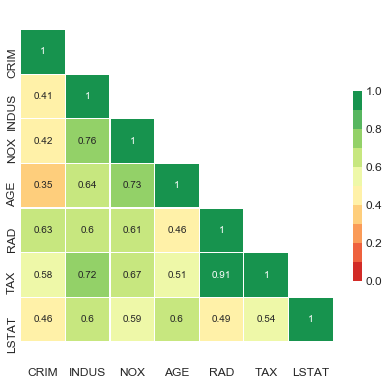

In [7]:
Correlation_Plot (Temp,len(High_Correlated_Attributes(Data)))

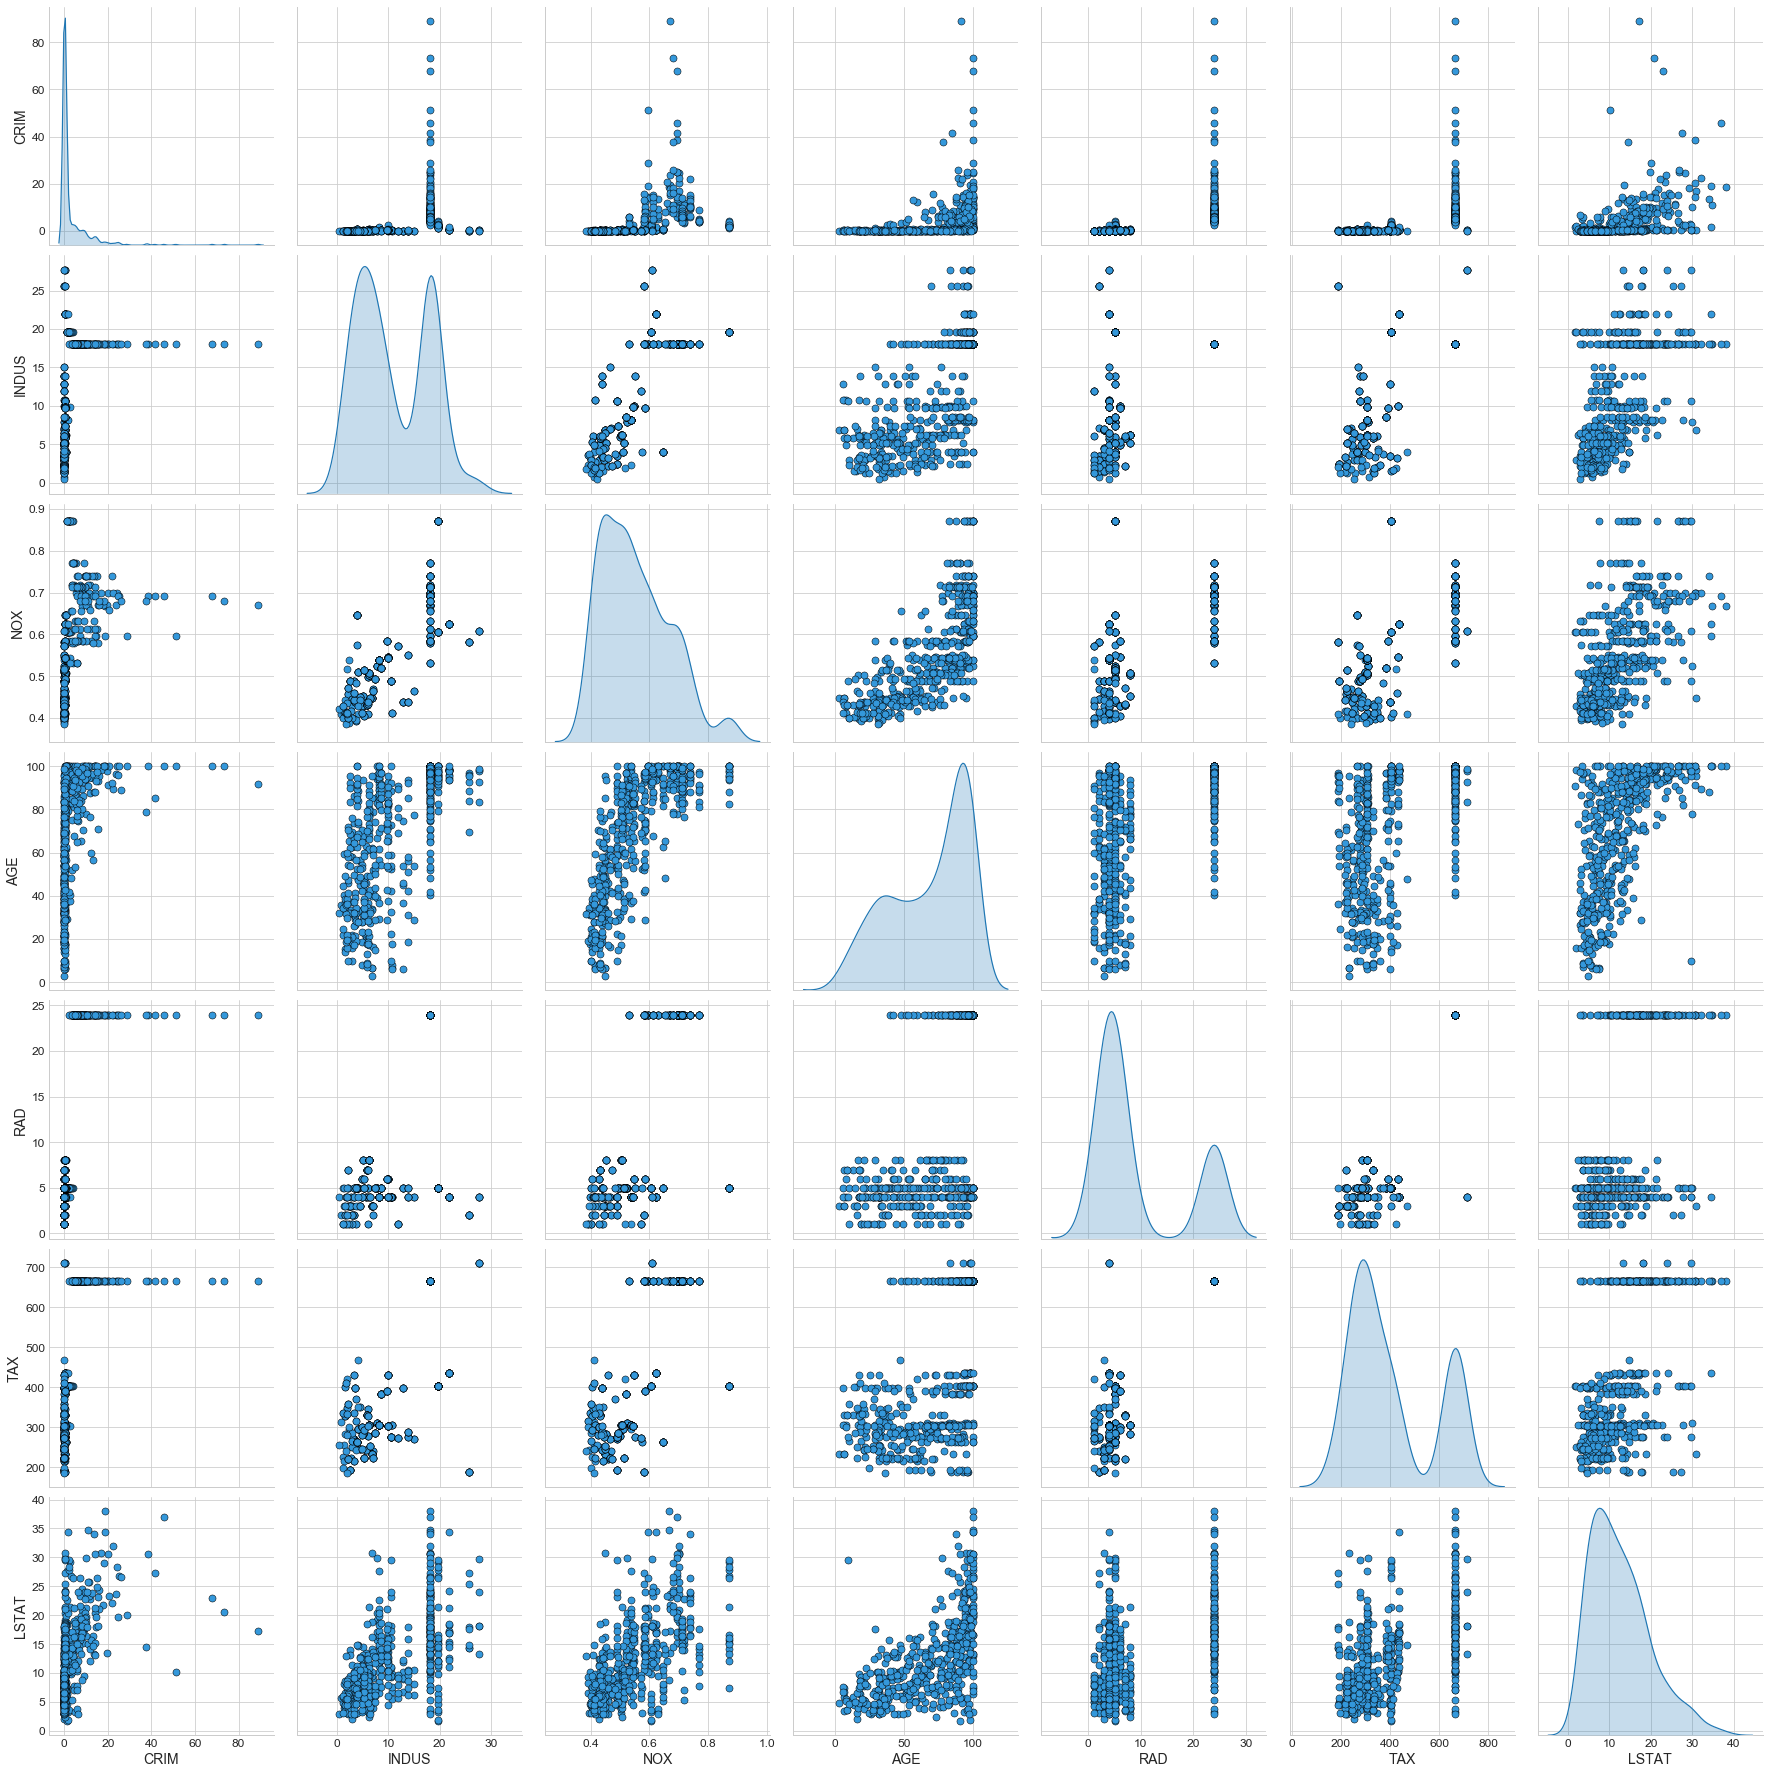

In [8]:
_ = sns.pairplot(Temp, height=3.5,diag_kind="kde",
                 plot_kws=dict(s=50, color="#3498db", edgecolor="k", linewidth=0.5),diag_kws=dict(shade=True))

A univariate distribution of observations:

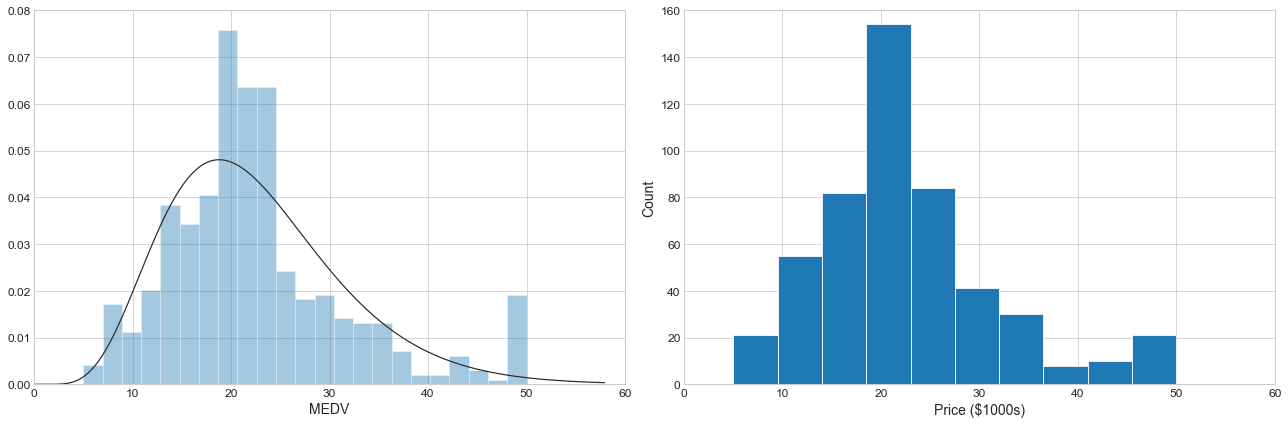

In [9]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
_ = sns.distplot(Data.MEDV, kde=False, fit=stats.gamma, ax=ax[0])
_ = ax[0].set_xlim([0, 60])
_ = ax[0].set_ylim([0, 0.08])

_ = ax[1].hist(Data.MEDV)
_ = ax[1].set_xlabel('Price ($1000s)')
_ = ax[1].set_ylabel('Count')
_ = ax[1].set_xlim([0, 60])
_ = ax[1].set_ylim([0, 160])

plt.tight_layout()

# Train and Test Sets

In [10]:
X = Data.drop(columns='MEDV')
y = Data.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pd.DataFrame(data={'Set':['X_train','X_test','y_train','y_test'],
               'Shape':[X_train.shape, X_test.shape, y_train.shape, y_test.shape]}).set_index('Set').T

Set      X_train     X_test y_train  y_test
Shape  (354, 13)  (152, 13)  (354,)  (152,)

In the next section, we use the following function for plotting.

In [11]:
def Plot_Reg_Results(Expected, Predicted, Reg):
    fig, ax = plt.subplots(figsize=(10,5))
    _ = ax.scatter(Expected, Predicted)
    N = int(np.max(np.ceil([np.max(Expected), np.max(Predicted)])))+10
    _ = ax.plot([0, N], [0, N], '--k')
    _ = ax.set_xlabel('True price ($1000s)', fontsize=14)
    _ = ax.set_ylabel('Predicted price ($1000s)', fontsize=14)
    _ = ax.set_xlim([0, N])
    _ = ax.set_ylim([0, N])

    plt.tight_layout()

Moreover, we can create a table for later comparisons.

In [12]:
Results = pd.DataFrame(data={'Regression': ['Ordinary Least Squares'],'Score':'', 'MSE':'', 'Variance score':''})
Results = Results.set_index('Regression')

Next, we compare several regression models in terms of score, MSE, and Variance score.

# Generalized Linear Models

## Ordinary Least Squares

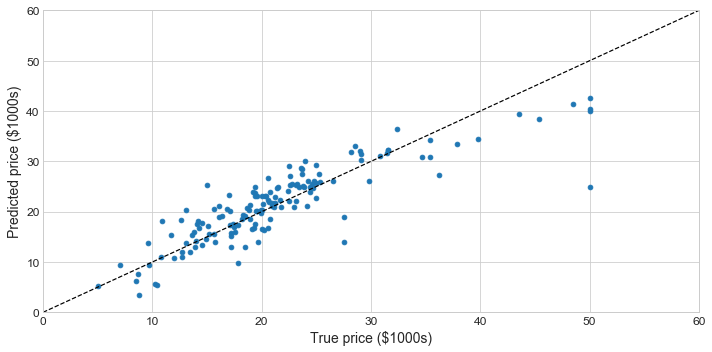

In [13]:
Reg = 'Ordinary Least Squares'
clf = linear_model.LinearRegression()

# the model
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted), r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Ridge

<IPython.core.display.Latex object>

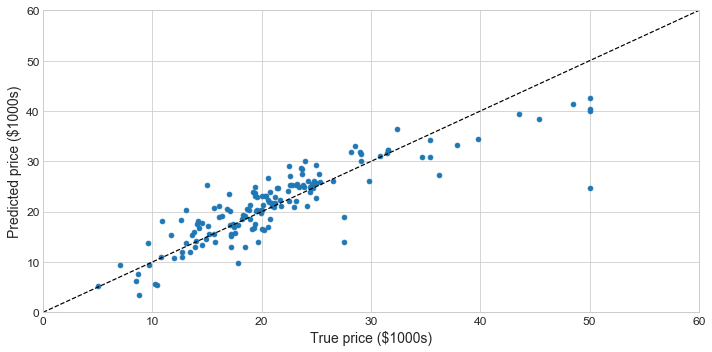

In [14]:
clf = linear_model.RidgeCV(alphas=np.logspace(-3, 3, 200))
clf.fit(X_train, y_train)
display(Latex(r'The parameter $\alpha$ = %.4f' % clf.alpha_))

Reg = 'Ridge'

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Lasso

<IPython.core.display.Latex object>

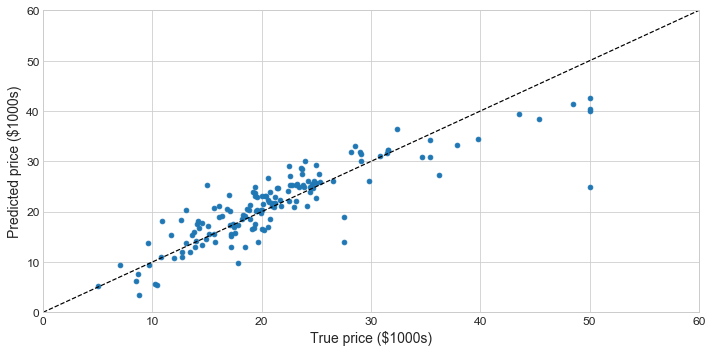

In [15]:
clf = linear_model.LassoCV(alphas=np.logspace(-3, 3, 200))
clf.fit(X_train, y_train)

display(Latex(r'The parameter $\alpha$ = %.4f' % clf.alpha_))

Reg = 'Lasso'

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Elastic-Net

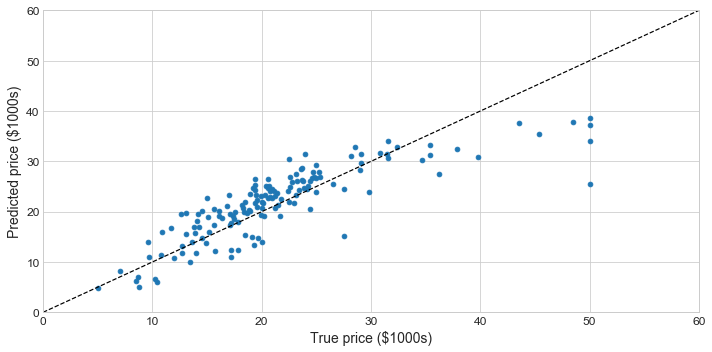

In [16]:
Reg = 'Elastic-Net'

clf = linear_model.ElasticNet(random_state=0)
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Least Angle Regressions (LARS)

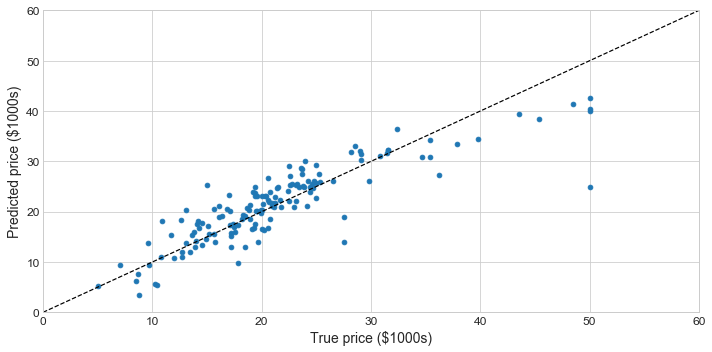

In [17]:
Reg = 'Least Angle Regressions (LARS)'

clf = linear_model.Lars(n_nonzero_coefs = len(X_train.columns))
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## LARS Lasso

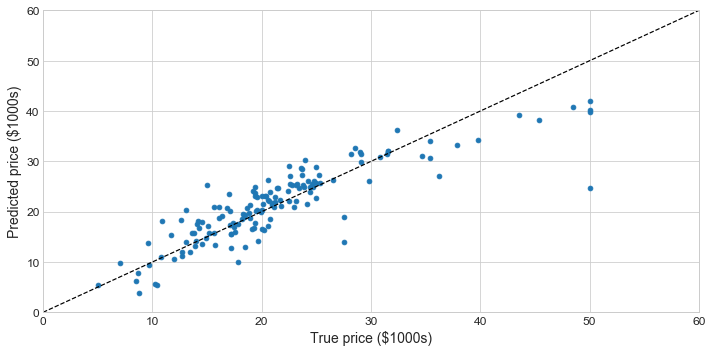

In [18]:
Reg = 'LARS Lasso'

clf = linear_model.LassoLars(alpha=.001)
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Orthogonal Matching Pursuit

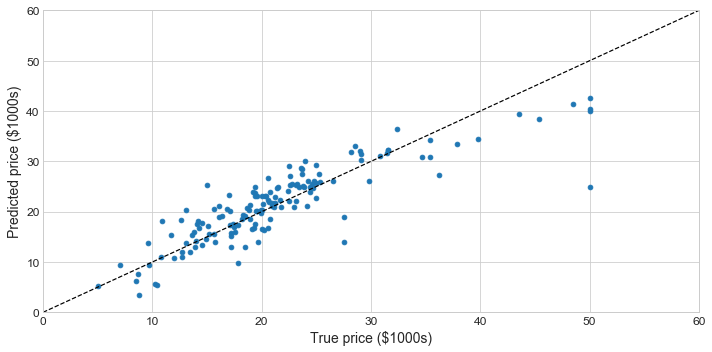

In [19]:
Reg = 'Orthogonal Matching Pursuit'

clf = linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs= len(X_train.columns))
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Bayesian Regression

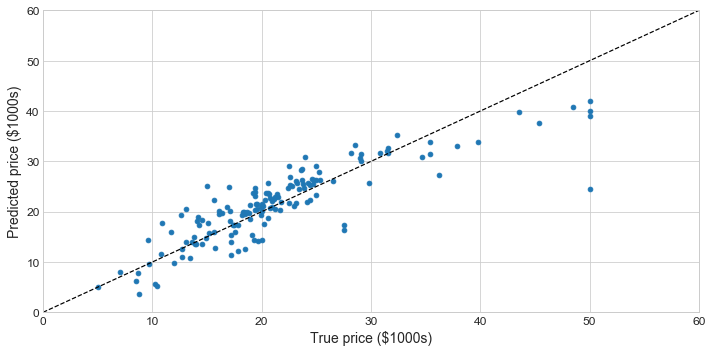

In [20]:
Reg = 'Bayesian Regression'

clf = linear_model.BayesianRidge()
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Huber Regressor

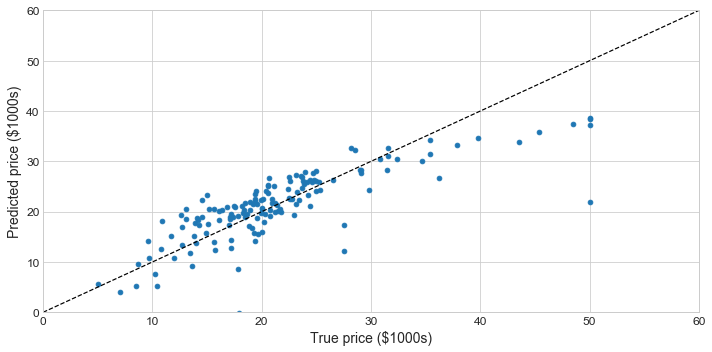

In [21]:
Reg = 'Huber Regressor'

clf = linear_model.HuberRegressor()
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Random Sample Consensus (RANSAC)

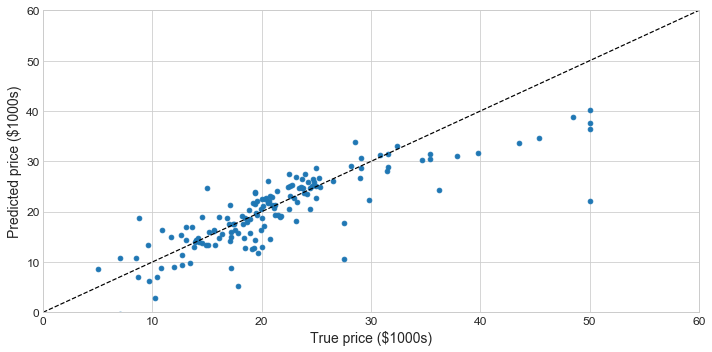

In [22]:
Reg = 'RANSAC'

clf = linear_model.RANSACRegressor()
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

# Other Models

## Kernel Ridge Regression

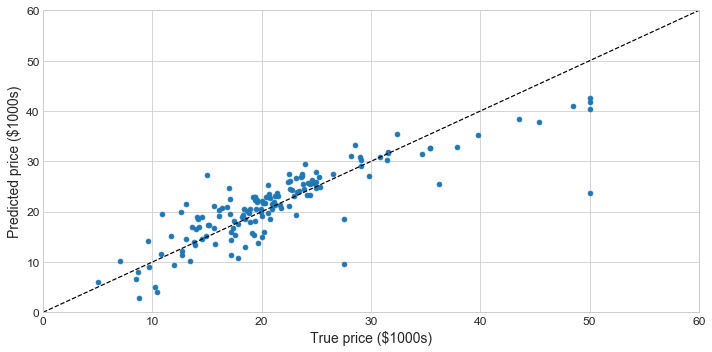

In [23]:
Reg = 'Kernel Ridge Regression'

clf = KernelRidge(alpha=1.0)
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Neural Network Regression Model (Supervised)

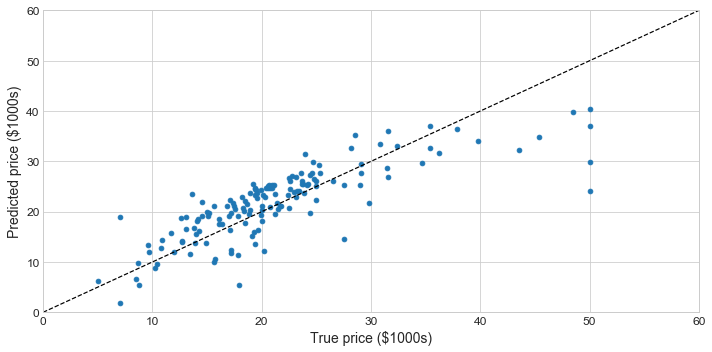

In [24]:
Reg = 'MLP Regressor'

clf = MLPRegressor()
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

 ## Decision Tree Regression

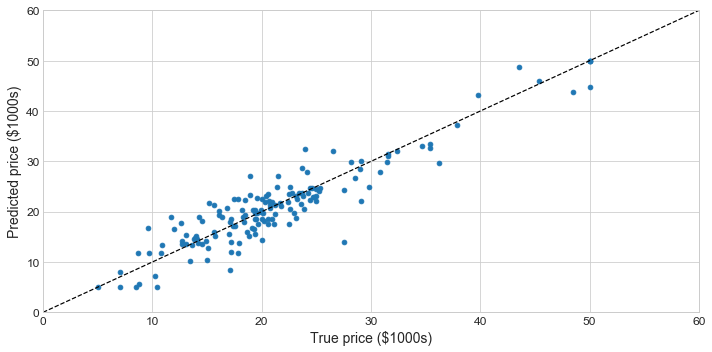

In [25]:
Reg = 'Decision Tree Regression'

clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Gradient Boosted Tree

We also can use the Gradient Boosting Regressor.

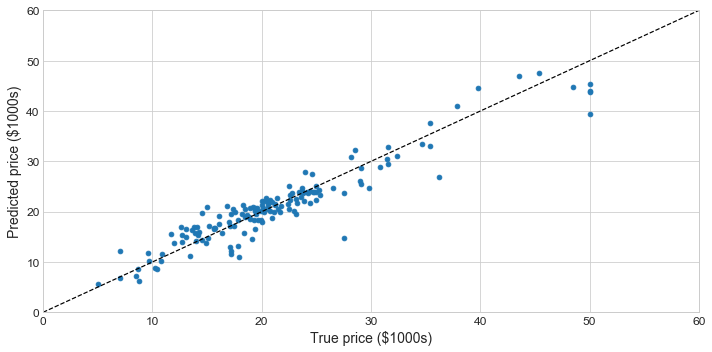

In [26]:
Reg = 'Gradient Boosted Tree'

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Ada Boost Regressor

See more about [Ada Boost Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor) here.

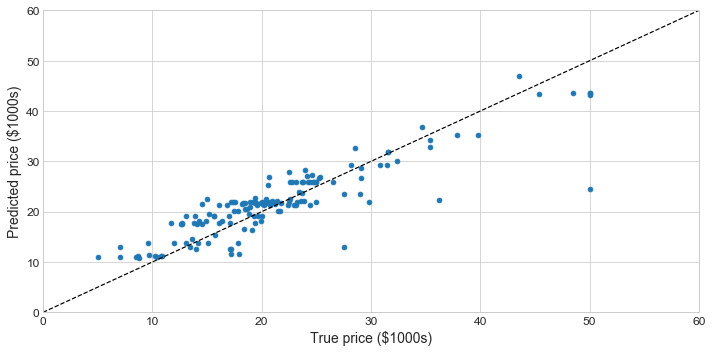

In [27]:
Reg = 'Ada Boost Regressor'

clf = AdaBoostRegressor()
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Bagging Regressor

See more about [Bagging Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor) here.

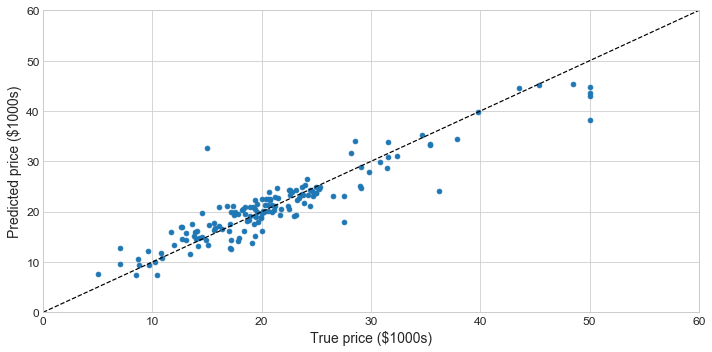

In [28]:
Reg = 'Bagging Regressor'

clf = BaggingRegressor()
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

## Random Forest Regressor

See more about [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) here.

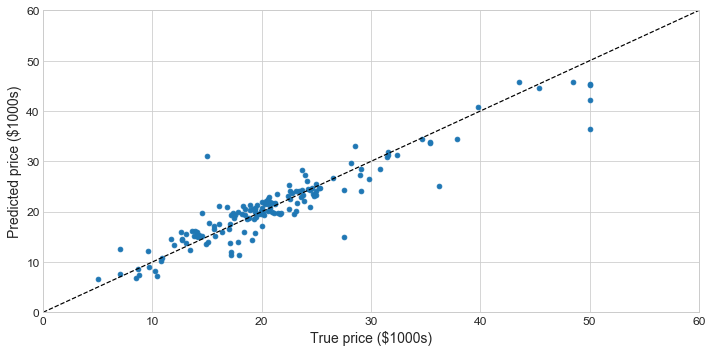

In [29]:
Reg = 'RandomForestRegressor'

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# Predicted Values
Predicted = clf.predict(X_test)
# Expected Values
Expected = y_test

# the plot
Plot_Reg_Results(Expected, Predicted, Reg)

# the table
Results.loc[Reg,:] = [clf.score(X_test, y_test), mean_squared_error(Expected, Predicted),
                                      r2_score(Expected, Predicted)]
display(Results.style.background_gradient(cmap='Greens', subset=['Score']).set_precision(2))

# Conclusion

The best results in the example are coming from:

In [30]:
Results.Score[Results.Score == Results.Score.max()].index[0]

'Gradient Boosted Tree'

The accuracy of predictions can vary depending on the setting that we implement in each regression.

***